# Project ModelEvaluation

We got an income statistics of US in the form of Datasets.

Steps of Preparing the Data for Machine Learning Algoritms:

**1.Get the data**

**2.Create the workspace**

**3.Download the datasets**

 - Take a Quick look at the Data Structure

**4.Data Cleaning**

**5.Handling Text and Categorical Attributes**

**6.Feature Scaling**

**7.Transformation Pipelines**

**8.Select and Train a Model**

 - Training and Evaluating on the Training Set#
 - Evaluation methodes:
   - RMSE, MSE, Cross Validation

**9. Fine-Tune Your Model**
 - Grid Search
   - Validation_curve for best hyperparameter selection
 - Random Search
 - Ensemble Method
   - Feature Selecting
   
**-------------------------------------------------------------------**



# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams # for better visualization style
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings("ignore")

# 0.1 Basics

**Reading The Data**

In [5]:
train_data = pd.read_csv('data_train.csv')
test_data = pd.read_csv('data_test.csv')

**Visualisation of the Data**

In [3]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


**Basic Statistics About Data**

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [5]:
train_data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [6]:
train_data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [7]:
train_data.corr()['income']

age               0.234037
workclass         0.047203
fnlwgt           -0.009463
education        -0.046218
education-num     0.335154
marital-status    0.002644
occupation       -0.104691
relationship     -0.171294
race             -0.067713
sex              -0.215980
capital-gain      0.223329
capital-loss      0.150526
hours-per-week    0.229689
native-country   -0.028478
income            1.000000
Name: income, dtype: float64

# 1.0 Data Pre-Processing

**DataFrameSelection function**

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

**Pipelines with StandardScaling**

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('Frame_selector', DataFrameSelector(['fnlwgt','capital-gain'])),
        ('std_scaler', StandardScaler()),
    ])


In [10]:
num_pipeline.fit_transform(train_data)

array([[-1.06361075,  0.1484529 ],
       [-1.008707  , -0.14592048],
       [ 0.2450785 , -0.14592048],
       ...,
       [-0.35877741, -0.14592048],
       [ 0.11095988, -0.14592048],
       [ 0.92989258,  1.88842434]])

In [11]:
train_data[['fnlwgt','capital-gain']] = num_pipeline.fit_transform(train_data)

In [12]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,-1.063611,0,13,0,0,0,0,0,0.148453,0,40,0,0
1,50,1,-1.008707,0,13,1,1,1,0,0,-0.145920,0,13,0,0
2,38,2,0.245079,1,9,2,2,0,0,0,-0.145920,0,40,0,0
3,53,2,0.425801,2,7,1,2,1,1,0,-0.145920,0,40,0,0
4,28,2,1.408176,0,13,1,3,2,1,1,-0.145920,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,0.639741,6,12,1,10,2,0,1,-0.145920,0,38,0,0
32557,40,2,-0.335433,1,9,1,9,1,0,0,-0.145920,0,40,0,1
32558,58,2,-0.358777,1,9,6,0,4,0,1,-0.145920,0,40,0,0
32559,22,2,0.110960,1,9,0,0,3,0,0,-0.145920,0,20,0,0


# 2.0 Train&Test splitting

**Selecting Training and splitting features**

In [13]:
y_data_train = train_data['income']
x_data_train = train_data.iloc[:,:-1]

**Selecting Model per request**

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest_clf = RandomForestClassifier(random_state=42)

**Cross-Validation to score the model(yet)**

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
forest_score = cross_val_score(forest_clf, x_data_train,y_data_train,cv=5)

**Not Bad After All!!!**

In [18]:
forest_score.mean()

0.8580205399067674

***is it the best we can get ?***

### Let's see

***For this assignment I have used the three most common and probably the best method for hyperparameter Tuning***

### 1st.Validation Curve

***A good way to visually check for potentially optimized values of model hyperparameters is with a validation curve. A validation curve can be plotted on a graph to show how well a model performs with different values of a single hyperparameter.***

In [19]:
from sklearn.model_selection import validation_curve

In [20]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(random_state=42),
                                X = x_data_train, y = y_data_train, 
                                param_name = 'n_estimators', 
                                param_range = [10,100,300,500,750,800,1200], cv = 5)

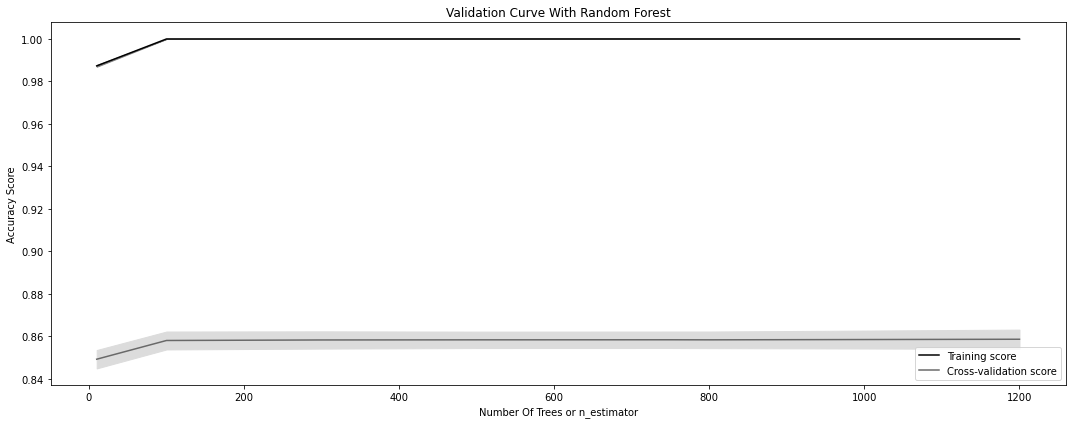

In [22]:
param_range = [10,100,300,500,750,800,1200]
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum, axis=1)
train_std = np.std(train_scoreNum, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum, axis=1)
test_std = np.std(test_scoreNum, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees or n_estimator")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

***The winner of n_estimator 'Visually' is 100***

In [23]:
train_scoreNum1, test_scoreNum1 = validation_curve(RandomForestClassifier(random_state=42),
                                                  X = x_data_train,y=y_data_train,
                                                  param_name = 'max_depth',
                                                  param_range = [5,10,15,20,25,30],
                                                  cv= 5)

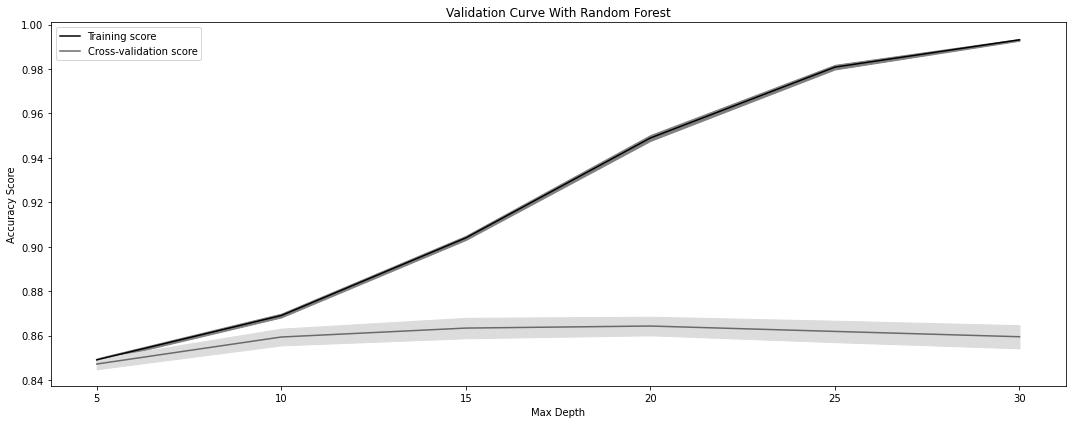

In [24]:
param_range = [5,10,15,20,25,30]
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum1, axis=1)
train_std = np.std(train_scoreNum1, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum1, axis=1)
test_std = np.std(test_scoreNum1, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

***The winner of Max Depth 'Visually' is 20***

In [25]:
train_scoreNum2, test_scoreNum2 = validation_curve(RandomForestClassifier(random_state=42),
                                                  X = x_data_train,y=y_data_train,
                                                  param_name = 'min_samples_split',
                                                  param_range = [5,10,15,20,25],
                                                  cv= 5)

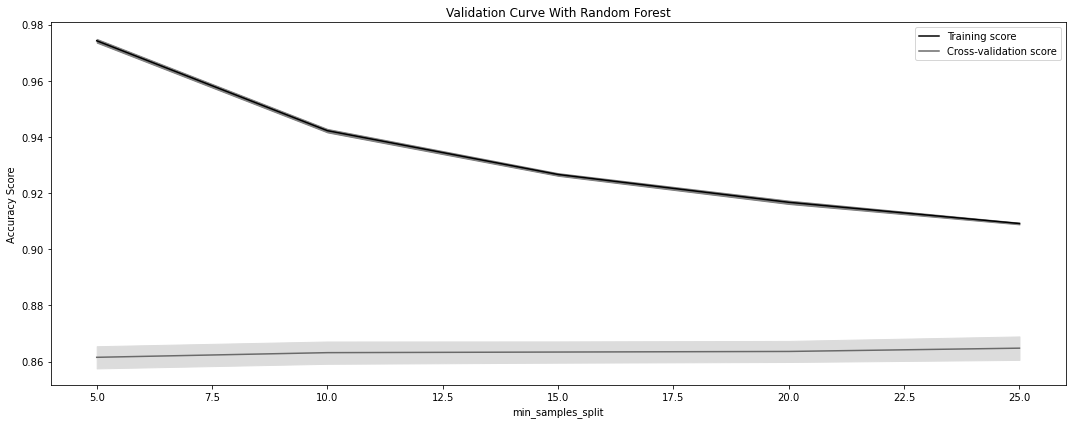

In [26]:
param_range = [5,10,15,20,25]
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum2, axis=1)
train_std = np.std(train_scoreNum2, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum2, axis=1)
test_std = np.std(test_scoreNum2, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

***The winner of Min Samples Split 'Visually' is 5***

In [27]:
train_scoreNum3, test_scoreNum3 = validation_curve(RandomForestClassifier(random_state=42),
                                                  X = x_data_train,y=y_data_train,
                                                  param_name = 'min_samples_leaf',
                                                  param_range = [5,10,15,20,25,30],
                                                  cv= 5)

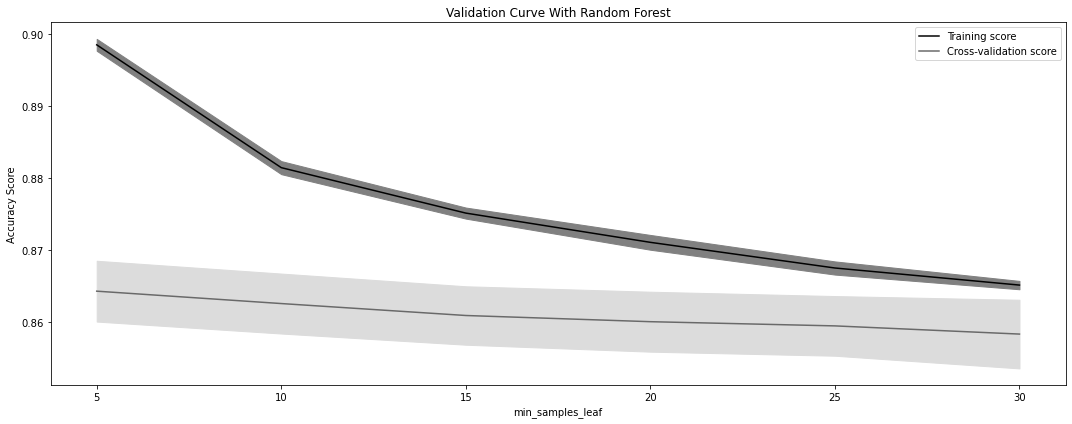

In [28]:
param_range = [5,10,15,20,25,30]
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scoreNum3, axis=1)
train_std = np.std(train_scoreNum3, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scoreNum3, axis=1)
test_std = np.std(test_scoreNum3, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel('min_samples_leaf')
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

**The winner of MinSamplesLeaf 'Visually' is 5**

### 2nd. GridSearch

***Another way to choose which hyperparameters to adjust is by conducting an exhaustive grid search or randomized search.
An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that you add.***

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
forest = RandomForestClassifier(random_state=42)

In [53]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 
max_features = ['auto', 'sqrt']
bootstrap = [True, False]

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
param_grid2 = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
                  bootstrap=bootstrap,
                  max_features=max_features)

In [35]:
grid_search = GridSearchCV(forest, param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True,
                          n_jobs=-1, verbose=1)

In [36]:
grid_search.fit(x_data_train,y_data_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 47.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [37]:
grid_search.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 300}

***One of HyperParameter in RandomForest is MaxFeatures which tells "How many Best feature should you select for best result"
Ofcourse I haven't used it here but just a HeadsUp if u do so, then it is possible to get a look at the features that actually
your data's accuracy depends, thank me later :)***

In [38]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [39]:
attributes = list(train_data.columns)

In [40]:
feature_importance

array([0.10939488, 0.02821219, 0.07525505, 0.03231857, 0.12414531,
       0.12213027, 0.05842528, 0.10805456, 0.01049663, 0.02395365,
       0.1734247 , 0.04992204, 0.06970364, 0.01456324])

In [41]:
sorted(zip(feature_importance, attributes), reverse=True)

[(0.17342469928925713, 'capital-gain'),
 (0.12414530893534441, 'education-num'),
 (0.12213026561984243, 'marital-status'),
 (0.10939488370749308, 'age'),
 (0.10805455879433673, 'relationship'),
 (0.07525504974051068, 'fnlwgt'),
 (0.06970363668241596, 'hours-per-week'),
 (0.058425280968053814, 'occupation'),
 (0.049922036733797207, 'capital-loss'),
 (0.032318565146900964, 'education'),
 (0.028212186907223973, 'workclass'),
 (0.023953654641528165, 'sex'),
 (0.01456324031142719, 'native-country'),
 (0.010496632521868101, 'race')]

In [42]:
grid_search.best_score_

-0.13467016543363847

In [43]:
cvres = grid_search.cv_results_

In [44]:
for mean_score,params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.39092295543652095 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.3907657714054286 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.3907657533041489 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.39159013315550806 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
0.3910014694852619 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}
0.39052990692420847 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.3909229192485172 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.390765753304149 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
0.39143323510699096 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
0.3907657472703888 {'max_depth': 5, 'min_samples_leaf': 1, '

## 3rd. RandomizedSearchCV

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
param_grid2 = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
                  bootstrap=bootstrap,
                  max_features=max_features)
rf_random = RandomizedSearchCV(estimator = forest, 
                               param_distributions = param_grid2,
                               n_iter = 100, cv = 5,verbose=1, 
                               random_state=42, n_jobs = -1)

In [55]:
best_model = rf_random.fit(x_data_train, y_data_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.9min finished


In [56]:
best_model.best_params_

{'n_estimators': 500,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

# 3.0 Evaluating the results

**RandomSearchCV Result**

In [82]:
RandomGridResult = RandomForestClassifier(n_estimators=500,min_samples_split=100,
                                     min_samples_leaf=1,
                                     max_features='sqrt',
                                     max_depth=30,
                                     bootstrap=False)

In [83]:
RandomGridResult.fit(x_data_train,y_data_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=100, n_estimators=500)

**GridSearchCV Result**

In [94]:
GridSearchResult = RandomForestClassifier(n_estimators=300,
                                     min_samples_leaf=1,
                                     min_samples_split=15,
                                     max_depth=25)

In [95]:
GridSearchResult.fit(x_data_train,y_data_train)

RandomForestClassifier(max_depth=25, min_samples_split=15, n_estimators=300)

**ValidationCurveResult**

In [96]:
ValidationCurveResult = RandomForestClassifier(n_estimators=100, max_depth=20,
                                     min_samples_split=5,min_samples_leaf=5
                                     )

In [97]:
ValidationCurveResult.fit(x_data_train,y_data_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5)

In [98]:
lst = [ValidationCurveResult, GridSearchResult, RandomGridResult]
for number, i in enumerate(lst):
    print(f'Best Score for {i} is', i.score(x_data_train,y_data_train))

Best Score for RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5) is 0.8907588833266792
Best Score for RandomForestClassifier(max_depth=25, min_samples_split=15, n_estimators=300) is 0.915819538711956
Best Score for RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=100, n_estimators=500) is 0.8905746138017874


**So..The Winner is 'GridSearchCV' with 91% accuracy, Amazing!**

**Now it is turn to apply our best Model on Test Data**

## 3.1 Testing the model on UNSEEN DATA aka TestData

**Running the same pipeline on test data**

In [100]:
test_data[['fnlwgt','capital-gain']] = num_pipeline.fit_transform(test_data)

**you guessed it right ...**

In [101]:
x_test_data = test_data.iloc[:,:-1]
y_test_data = test_data.iloc[:,-1]

**Let's see what we have cooked...**

In [102]:
y_test_data_predict = GridSearchResult.predict(x_test_data)

**Using Classification Report which makes precision, recall and f1_score report all at once**

In [125]:
from sklearn.metrics import classification_report

In [127]:
classes = ["Bellow 50K", "Over 50K"]
clsf_report = classification_report(y_test_data,y_test_data_predict,target_names=classes)

In [128]:
print('Classification Report shows: ', clsf_report)

Classification Report shows:                precision    recall  f1-score   support

  Bellow 50K       0.88      0.94      0.91     12435
    Over 50K       0.76      0.59      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281



**Another Library wich is helpful visualizing the ClassificationReport is 'YellowBrick'**

In [130]:
from yellowbrick.classi fier import ClassificationReport

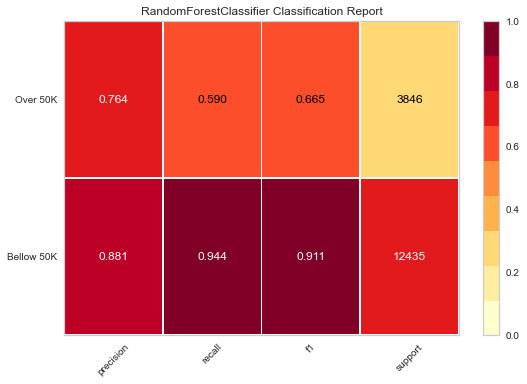

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [138]:
visualizer = ClassificationReport(GridSearchResult,classes=classes,support=True,legend=True)
visualizer.fit(x_data_train,y_data_train)
visualizer.score(x_test_data,y_test_data)
visualizer.show()